# 0. 월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회

- [월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회](https://dacon.io/competitions/official/235713/)

<br>

- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
    - 'Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'
- edu_type: 교육 수준
    - 'Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'
- family_type: 결혼 여부
    - 'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'
- house_type: 생활 방식
    - 'Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment'
- DAYS_BIRTH: 출생일 => 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일 => 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미(양수 값은 고용되지 않은 상태를 의미함)
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월 => 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

	

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
train = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/credit/train.csv", index_col="index")
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0


In [4]:
test = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/credit/test.csv", index_col="index")
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0


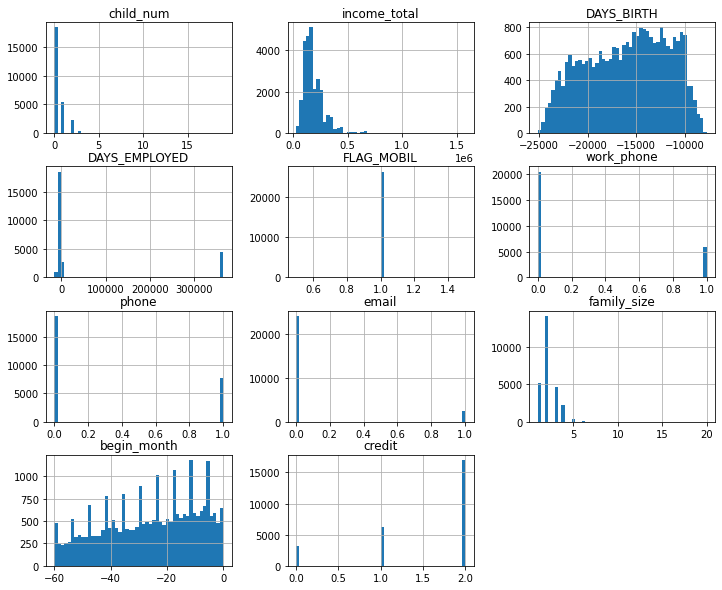

In [5]:
train.hist(figsize=(12, 10), bins=50);

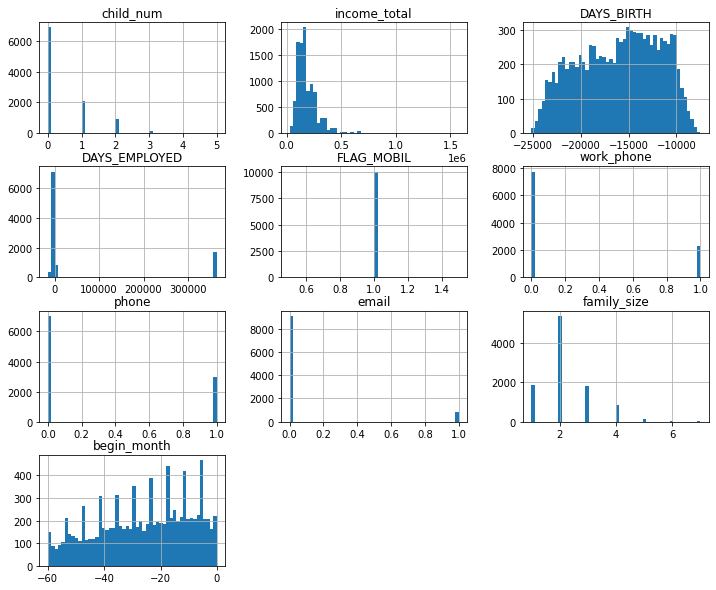

In [6]:
test.hist(figsize=(12, 10), bins=50);

# 1. Feature Engineering

## downcast

In [7]:
def downcast(df):
    for i in df.columns:
        if df[i].dtypes == "int64":
            df[i] = pd.to_numeric(df[i], downcast="unsigned")
        elif df[i].dtypes == "float64":
            df[i] = pd.to_numeric(df[i], downcast="float")
        elif df[i].dtypes == "object":
            df[i] = df[i].astype("category")

In [8]:
downcast(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         26457 non-null  category
 1   car            26457 non-null  category
 2   reality        26457 non-null  category
 3   child_num      26457 non-null  uint8   
 4   income_total   26457 non-null  float32 
 5   income_type    26457 non-null  category
 6   edu_type       26457 non-null  category
 7   family_type    26457 non-null  category
 8   house_type     26457 non-null  category
 9   DAYS_BIRTH     26457 non-null  int64   
 10  DAYS_EMPLOYED  26457 non-null  int64   
 11  FLAG_MOBIL     26457 non-null  uint8   
 12  work_phone     26457 non-null  uint8   
 13  phone          26457 non-null  uint8   
 14  email          26457 non-null  uint8   
 15  occyp_type     18286 non-null  category
 16  family_size    26457 non-null  float32 
 17  begin_month    26457 non-null  

In [9]:
downcast(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         10000 non-null  category
 1   car            10000 non-null  category
 2   reality        10000 non-null  category
 3   child_num      10000 non-null  uint8   
 4   income_total   10000 non-null  float32 
 5   income_type    10000 non-null  category
 6   edu_type       10000 non-null  category
 7   family_type    10000 non-null  category
 8   house_type     10000 non-null  category
 9   DAYS_BIRTH     10000 non-null  int64   
 10  DAYS_EMPLOYED  10000 non-null  int64   
 11  FLAG_MOBIL     10000 non-null  uint8   
 12  work_phone     10000 non-null  uint8   
 13  phone          10000 non-null  uint8   
 14  email          10000 non-null  uint8   
 15  occyp_type     6848 non-null   category
 16  family_size    10000 non-null  float32 
 17  begin_month    10000 non-nu

## 결측치 제거

In [10]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [11]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [12]:
train = train.drop(columns="occyp_type")
test = test.drop(columns="occyp_type")

## 이상치 대체

#### child_num > 5 이상인 값 제거

In [13]:
train.child_num.value_counts().sort_index()

0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
Name: child_num, dtype: int64

In [14]:
train = train[train["child_num"] <= 5]
test = test[test["child_num"] <= 5]

### DAYS_EMPLOYED가 양수인 경우, 무직자로 판단 => 구분하기 쉽게 0으로 변환

In [15]:
train.DAYS_EMPLOYED.value_counts().sort_index()

-15713        1
-15661        2
-15072        3
-15038       14
-14887        5
           ... 
-70           4
-65           1
-43           1
-17           2
 365243    4438
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

In [16]:
test.DAYS_EMPLOYED.value_counts().sort_index()

-15661        2
-15227        1
-15038        2
-14887        1
-14810        2
           ... 
-73           2
-66           1
-65           1
-17           1
 365243    1697
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64

In [17]:
train.loc[train["DAYS_EMPLOYED"] >= 0, "DAYS_EMPLOYED"] = 0
test.loc[test["DAYS_EMPLOYED"] >= 0, "DAYS_EMPLOYED"] = 0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### DAYS_BIRTH, DAYS_EMPLOYED, begin_month 양수 변환

In [18]:
train["DAYS_BIRTH"] = abs(train["DAYS_BIRTH"])
test["DAYS_BIRTH"] = abs(test["DAYS_BIRTH"])

train["DAYS_EMPLOYED"] = abs(train["DAYS_EMPLOYED"])
test["DAYS_EMPLOYED"] = abs(test["DAYS_EMPLOYED"])

train["begin_month"] = abs(train["begin_month"])
test["begin_month"] = abs(test["begin_month"])

<ipython-input-18-3e38c552bb9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["DAYS_BIRTH"] = abs(train["DAYS_BIRTH"])
<ipython-input-18-3e38c552bb9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["DAYS_EMPLOYED"] = abs(train["DAYS_EMPLOYED"])
<ipython-input-18-3e38c552bb9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

### FLAG_MOBIL 값이 모두 1이므로 제거

In [19]:
train.FLAG_MOBIL.value_counts()

1    26451
Name: FLAG_MOBIL, dtype: int64

In [20]:
test.FLAG_MOBIL.value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

In [21]:
train = train.drop(columns="FLAG_MOBIL")
test = test.drop(columns="FLAG_MOBIL")

## 파생변수

### DAYS_BIRTH 출생일로 나이 컬럼 만들기

In [22]:
train["age"] = train["DAYS_BIRTH"] // 365
test["age"] = test["DAYS_BIRTH"] // 365

### DAYS_EMPLOYED 업무 시작일로 근속연수 컬럼 만들기

In [23]:
train["employed"] = train["DAYS_EMPLOYED"] // 365
test["employed"] = test["DAYS_EMPLOYED"] // 365

### 다중공선을 보이는 컬럼 삭제
- 다중공선성 (multicollinearity) : 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우
    - DAYS_BIRTH => age
    - DAYS_EMPLOYED => employed
    - 기존 컬럼 삭제 !

In [24]:
train = train.drop(columns=["DAYS_BIRTH", "DAYS_EMPLOYED"])
test = test.drop(columns=["DAYS_BIRTH", "DAYS_EMPLOYED"])

## Encoding

### Binary Encoding
- gender, car, reality

In [25]:
train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,family_size,begin_month,credit,age,employed
index,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,0,0,0,2.0,6.0,1.0,38,12
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,3.0,5.0,1.0,31,4


In [26]:
train["gender"] = train["gender"].replace(["M", "F"], [0, 1])
test["gender"] = test["gender"].replace(["M", "F"], [0, 1])

train["car"] = train["car"].replace(["N", "Y"], [0, 1])
test["car"] = test["car"].replace(["N", "Y"], [0, 1])

train["reality"] = train["reality"].replace(["N", "Y"], [0, 1])
test["reality"] = test["reality"].replace(["N", "Y"], [0, 1])

### Ordinal Encoding
- income_type, edu_type, family_type, house_type

In [27]:
from sklearn.preprocessing import OrdinalEncoder

cat_features = ["income_type", "edu_type", "family_type", "house_type"]

encoder = OrdinalEncoder()

train[cat_features] = encoder.fit_transform(train[cat_features])
test[cat_features] = encoder.fit_transform(test[cat_features])

## Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train["income_total"] = scaler.fit_transform(train[["income_total"]])
test["income_total"] = scaler.fit_transform(test[["income_total"]])

## dtype 변경

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26451 non-null  int64  
 1   car           26451 non-null  int64  
 2   reality       26451 non-null  int64  
 3   child_num     26451 non-null  uint8  
 4   income_total  26451 non-null  float32
 5   income_type   26451 non-null  float64
 6   edu_type      26451 non-null  float64
 7   family_type   26451 non-null  float64
 8   house_type    26451 non-null  float64
 9   work_phone    26451 non-null  uint8  
 10  phone         26451 non-null  uint8  
 11  email         26451 non-null  uint8  
 12  family_size   26451 non-null  float32
 13  begin_month   26451 non-null  float32
 14  credit        26451 non-null  float32
 15  age           26451 non-null  int64  
 16  employed      26451 non-null  int64  
dtypes: float32(4), float64(4), int64(5), uint8(4)
memory usage: 2.5 MB


- gender, car, reality => binary encoding 으로 정수형 변환 가능
- family_size, begin_month, credit => 가족 규모, 신용카드 발급 월, 신용도이므로 정수형 변환 가능


- income_type은 정규화 처리 => float

In [30]:
col = ["gender", "car", "reality", "family_size", "begin_month", "credit"]

In [31]:
def downcast2(df):
    if "credit" in df.columns:
        for i in col:
            df[i] = pd.to_numeric(df[i], downcast="unsigned")
    else:
        for i in col[:-1]:
            df[i] = pd.to_numeric(df[i], downcast="unsigned")

In [32]:
downcast2(train)
downcast2(test)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26451 non-null  uint8  
 1   car           26451 non-null  uint8  
 2   reality       26451 non-null  uint8  
 3   child_num     26451 non-null  uint8  
 4   income_total  26451 non-null  float32
 5   income_type   26451 non-null  float64
 6   edu_type      26451 non-null  float64
 7   family_type   26451 non-null  float64
 8   house_type    26451 non-null  float64
 9   work_phone    26451 non-null  uint8  
 10  phone         26451 non-null  uint8  
 11  email         26451 non-null  uint8  
 12  family_size   26451 non-null  uint8  
 13  begin_month   26451 non-null  uint8  
 14  credit        26451 non-null  uint8  
 15  age           26451 non-null  int64  
 16  employed      26451 non-null  int64  
dtypes: float32(1), float64(4), int64(2), uint8(10)
memory usage: 1.8 MB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        10000 non-null  uint8  
 1   car           10000 non-null  uint8  
 2   reality       10000 non-null  uint8  
 3   child_num     10000 non-null  uint8  
 4   income_total  10000 non-null  float32
 5   income_type   10000 non-null  float64
 6   edu_type      10000 non-null  float64
 7   family_type   10000 non-null  float64
 8   house_type    10000 non-null  float64
 9   work_phone    10000 non-null  uint8  
 10  phone         10000 non-null  uint8  
 11  email         10000 non-null  uint8  
 12  family_size   10000 non-null  uint8  
 13  begin_month   10000 non-null  uint8  
 14  age           10000 non-null  int64  
 15  employed      10000 non-null  int64  
dtypes: float32(1), float64(4), int64(2), uint8(9)
memory usage: 673.8 KB


# 데이터셋 만들기

In [37]:
set(train.columns) - set(test.columns)

{'credit'}

In [38]:
label_name = "credit"

feature_names = train.columns.to_list()
feature_names.remove(label_name)
feature_names

['gender',
 'car',
 'reality',
 'child_num',
 'income_total',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month',
 'age',
 'employed']

In [39]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

# 2. CatBoost

In [41]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.4 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()

In [43]:
clf.fit(X_train, y_train)

Learning rate set to 0.093512
0:	learn: 1.0462249	total: 105ms	remaining: 1m 45s
1:	learn: 1.0048011	total: 162ms	remaining: 1m 20s
2:	learn: 0.9715757	total: 200ms	remaining: 1m 6s
3:	learn: 0.9446787	total: 240ms	remaining: 59.7s
4:	learn: 0.9227557	total: 303ms	remaining: 1m
5:	learn: 0.9046458	total: 386ms	remaining: 1m 3s
6:	learn: 0.8889467	total: 451ms	remaining: 1m 3s
7:	learn: 0.8765953	total: 492ms	remaining: 1m 1s
8:	learn: 0.8654872	total: 568ms	remaining: 1m 2s
9:	learn: 0.8566968	total: 637ms	remaining: 1m 3s
10:	learn: 0.8489092	total: 707ms	remaining: 1m 3s
11:	learn: 0.8423437	total: 744ms	remaining: 1m 1s
12:	learn: 0.8367919	total: 775ms	remaining: 58.8s
13:	learn: 0.8320869	total: 820ms	remaining: 57.7s
14:	learn: 0.8280067	total: 866ms	remaining: 56.9s
15:	learn: 0.8246380	total: 900ms	remaining: 55.3s
16:	learn: 0.8217416	total: 933ms	remaining: 53.9s
17:	learn: 0.8195692	total: 971ms	remaining: 53s
18:	learn: 0.8171510	total: 1.01s	remaining: 52s
19:	learn: 0.815

In [46]:
y_pred = clf.predict_proba(X_test)

In [58]:
y_predict = np.argmax(y_pred, axis=1)
y_predict

array([2, 2, 2, ..., 2, 2, 2])

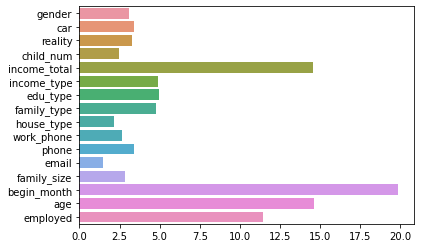

In [48]:
sns.barplot(x=clf.feature_importances_, y=clf.feature_names_, ci=None);

## 제출

In [81]:
submit = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/credit/sample_submission.csv")

In [82]:
y_predict = pd.get_dummies(y_predict)
y_predict

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,1
9998,0,0,1


In [83]:
submit["0"] = y_predict[0]
submit["1"] = y_predict[1]
submit["2"] = y_predict[2]
submit

,index,0,1,2
0,26457,0,0,1
1,26458,0,0,1
2,26459,0,0,1
3,26460,0,0,1
4,26461,0,0,1
...,...,...,...,...
9995,36452,0,0,1
9996,36453,0,0,1
9997,36454,0,0,1
9998,36455,0,0,1


In [84]:
submit.to_csv("submit.csv", index=False)

In [85]:
pd.read_csv("submit.csv")

,index,0,1,2
0,26457,0,0,1
1,26458,0,0,1
2,26459,0,0,1
3,26460,0,0,1
4,26461,0,0,1
...,...,...,...,...
9995,36452,0,0,1
9996,36453,0,0,1
9997,36454,0,0,1
9998,36455,0,0,1
